In [4]:
# This is largely copied from code in the docs:
# http://docs.juliaplots.org/latest/ (Author: Thomas Breloff)
# My attempt at animation failed see Lorenz.jl and 
# https://discourse.julialang.org/t/how-to-create-an-animation-based-on-t-x-y-and-z-data/25672/4
# define the Hindmarsh-Rose attractor
using Plots;
mutable struct Hindmarsh
    dt; a; b; c; d; r; s; xr; I; x; y; z
end

function step!(l::Hindmarsh)
    dx = l.y-l.a*(l.x)^3+l.b*(l.x)^2-l.z+l.I       ; l.x += l.dt * dx
    dy = l.c-l.d*(l.x)^3-l.y                       ; l.y += l.dt * dy
    dz = l.r*(l.s*(l.x-l.xr)-l.z)                  ; l.z += l.dt * dz
end

attractor = Hindmarsh((dt = 0.001, a=1., b=3., c=1., d=5., r=1e-3, s=4., xr=-1.6, I=-2.0, x = 1., y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Hindmarsh-Rose Attractor", marker = 2, 
                xlabel="x", ylabel="y", zlabel="z",
                size=(1920,1080),
                label="")

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:10000
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 100

┌ Info: Saved animation to 
│   fn = /data/GitHub/mine/math/julia-scripts/Chaos/tmp.gif
└ @ Plots /home/fusion809/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/data/GitHub/mine/math/julia-scripts/Chaos/tmp.gif")

In [7]:
attractor.z

1.0339133643148677

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...


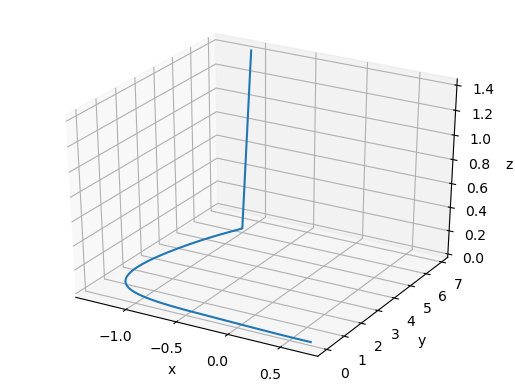

  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


PyObject Text(0.09109821416582611, 0.012204846458825157, 'z')

In [1]:
# This is largely copied from the ODE.jl repository
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("ODE")
using ODE;

function f(t, r)
	# Extract the coordinates from the r vector
	(x, y, z) = r

	# The Lorenz equations
    dx_dt = y - x.^3 + 3.0*x.^2 - z - 10.
	dy_dt = c - 5.0*x.^3 - y
	dz_dt = 1e-3*(4.0*(x+1.6)-z)

	# Return the derivatives as a vector
	[dx_dt; dy_dt; dz_dt]
end;

# Define time vector and interval grid
const dt = 0.0001
const tf = 1e3
t = 0:dt:tf

# Initial position in space
const r0 = [0.7; 0.0; 0.0]

# Constants sigma, rho and beta
const a  = 1.0;
const b  = 3.0;
const c  = 1.0;
const d  = 5.0;
const r  = 1e-3;
const s  = 4.0;
const xr = -1.6;
const I  = -10.0;

(t, pos) = ode78(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

# Get PyPlot and load it
Pkg.add("PyPlot")
using PyPlot

PyPlot.figure(1)
PyPlot.plot3D(x, y, z);
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")


In [10]:
y[end]

6.893522920997866